<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [31]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-05-22 02:39:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.13’

m4_survey_data.sqli 100%[===================>]  34.98M  41.3MB/s    in 0.8s    

2024-05-22 02:39:20 (41.3 MB/s) - ‘m4_survey_data.sqlite.13’ saved [36679680/36679680]



Connect to the database.


In [32]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [34]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT *
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


## Demo: How to list all tables


In [66]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [84]:
QUERY = """
SELECT LanguageDesireNextYear, Count(*) as Total FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Total DESC
LIMIT 10
"""
df = pd.read_sql_query(QUERY, conn)
df

,LanguageDesireNextYear,Total
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088
5,C#,3591
6,Bash/Shell/PowerShell,3097
7,Java,2953
8,Go,2759
9,Kotlin,1890


In [82]:
QUERY = """
SELECT DatabaseWorkedWith, Count(*) as Count FROM DatabaseWorkedWith
Group by DatabaseWorkedWith
Order by Count Desc
LIMIT 10
"""
df = pd.read_sql_query(QUERY, conn)
df

,DatabaseWorkedWith,Count
0,MySQL,5469
1,Microsoft SQL Server,4110
2,PostgreSQL,4097
3,SQLite,3248
4,MongoDB,3016
5,Redis,2508
6,Elasticsearch,1954
7,Oracle,1744
8,MariaDB,1709
9,Firebase,1314


## Demo: How to run a group by query


In [56]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
LIMIT 5
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78


## Demo: How to describe a table


In [38]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:ylabel='Frequency'>

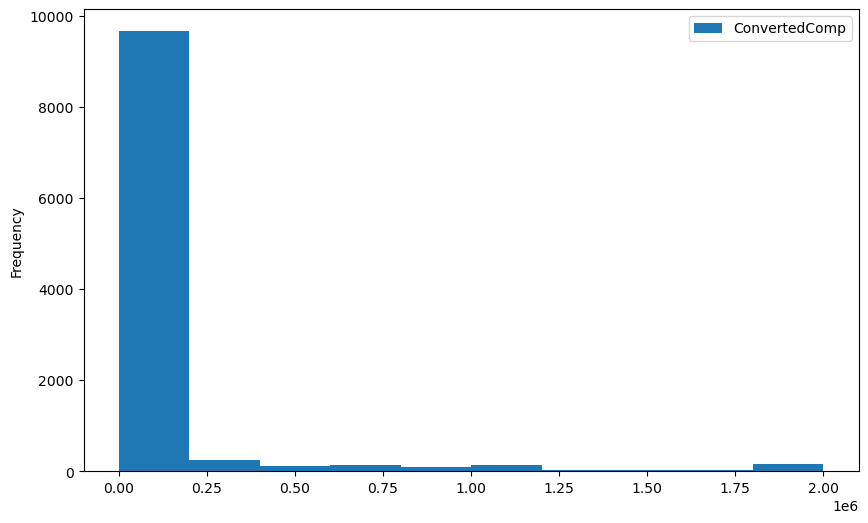

In [39]:
# your code goes here
Query2 = """
SELECT ConvertedComp
FROM master
"""

Converted = pd.read_sql_query(Query2, conn)
Converted.plot(kind='hist', figsize=(10, 6))

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:>

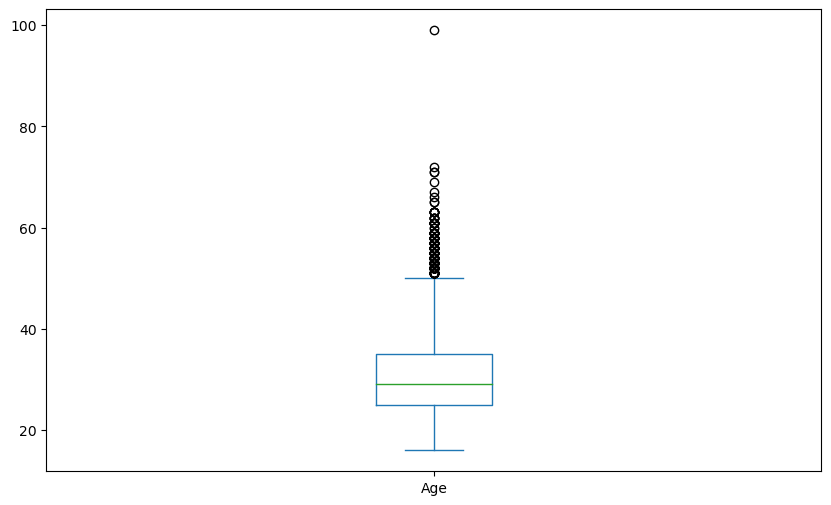

In [40]:
# your code goes here
QUERY3 = """
SELECT age FROM master 
"""
Age = pd.read_sql_query(QUERY3, conn)
Age.plot(kind='box', figsize=(10, 6))


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


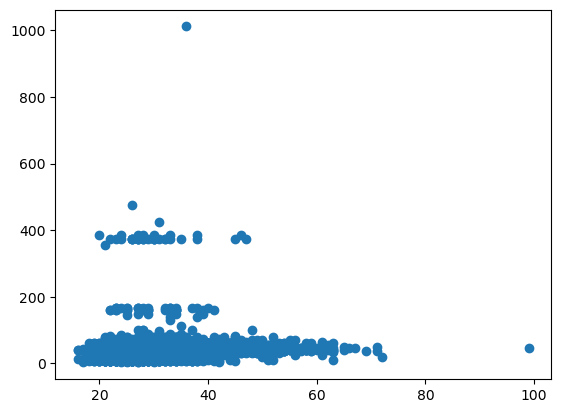

In [41]:
# your code goes here
QUERY4 = """ SELECT WorkWeekHrs FROM master """
WorkWeekHrs = pd.read_sql_query(QUERY4, conn) 
plt.scatter(x=Age, y=WorkWeekHrs)



### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


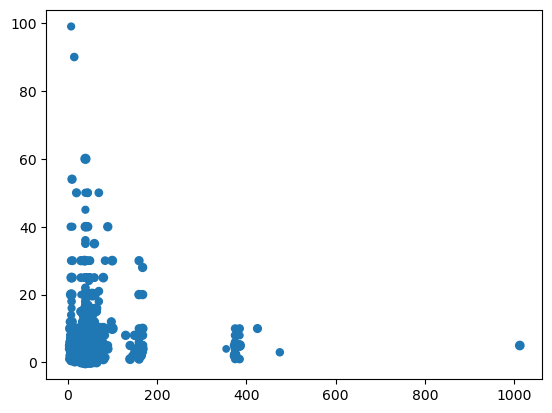

In [42]:
# your code goes here

QUERY5 = """SELECT CodeRevHrs FROM master """
CodeRevHrs = pd.read_sql_query(QUERY5, conn)
plt.scatter(x=WorkWeekHrs, y=CodeRevHrs, s=Age)

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


                        Count
DatabaseDesireNextYear       
PostgreSQL               4328
MongoDB                  3649
Redis                    3331
MySQL                    3281
Elasticsearch            2856


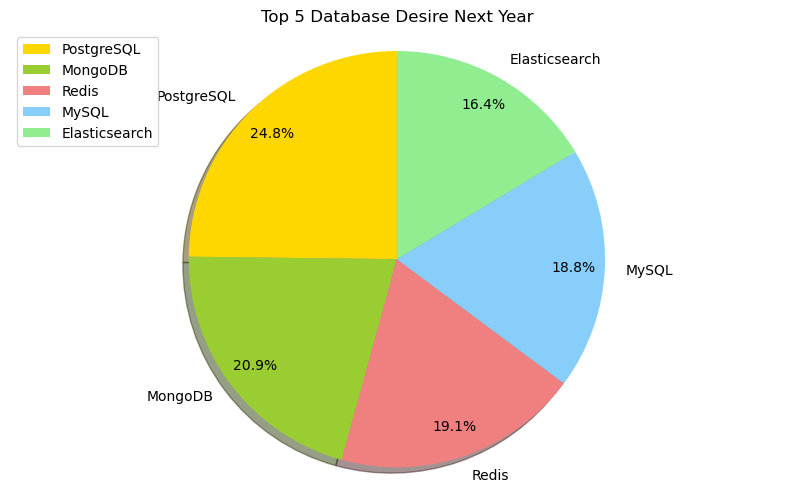

In [58]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear, Count(*) as Count
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)
df.set_index('DatabaseDesireNextYear', inplace=True)
color_list= ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
labels = df.index
print(df)

plt.figure(figsize=(10, 6))
plt.pie(df['Count'], labels=labels, colors= color_list, autopct='%1.1f%%', startangle=90, shadow=True, pctdistance=0.85)
plt.title('Top 5 Database Desire Next Year')
plt.axis('equal')
plt.legend(labels, loc='upper left')
plt.show()



In [57]:
QUERY = """ 
SELECT * FROM master
LIMIT 10"""
df = pd.read_sql_query(QUERY, conn)


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


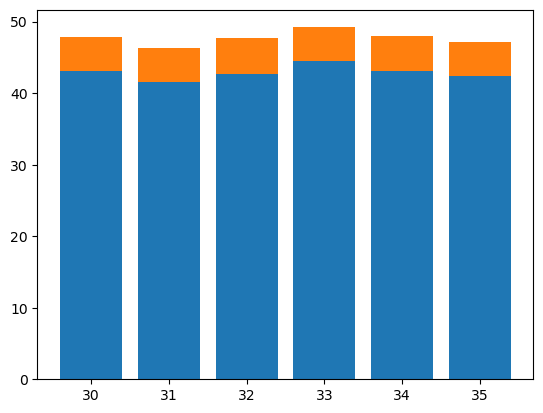

In [45]:
# your code goes here
QUERY5 = """
SELECT Avg(WorkWeekHrs), Avg(CodeRevHrs), Age
FROM master
WHERE Age between 30 and 35
GROUP BY Age
"""
z = pd.read_sql_query(QUERY5, conn)
WorkWeekHrs = z['Avg(WorkWeekHrs)']
CodeRevHrs = z['Avg(CodeRevHrs)']
Age = z['Age']

fig, ax = plt.subplots()
ax.bar(Age, WorkWeekHrs, label='WorkWeekHrs')
ax.bar(Age, CodeRevHrs, bottom=WorkWeekHrs,
       label='CodeRevHrs')
plt.show()


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


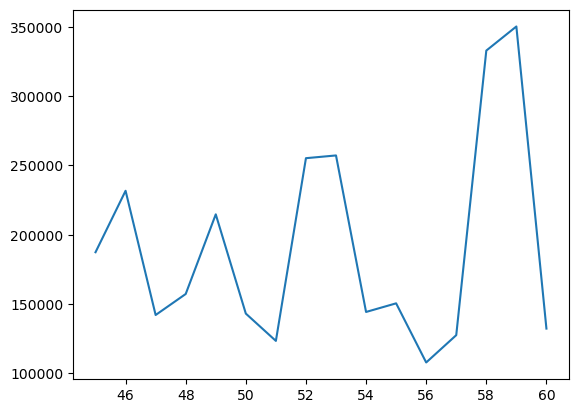

In [46]:
# your code goes here
QUERY6 = """SELECT Avg(ConvertedComp), Age From master WHERE Age between 45 and 60 GROUP BY Age"""
ConvertedComp_Age = pd.read_sql_query(QUERY6, conn)
plt.plot(ConvertedComp_Age['Age'],ConvertedComp_Age['Avg(ConvertedComp)'])
plt.show()



### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


                                          MainBranch  count(*)
0                     I am a developer by profession     10618
1  I am not primarily a developer, but I write co...       780


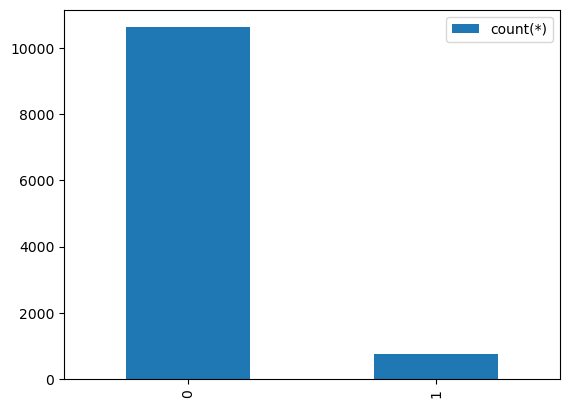

In [47]:
# your code goes here
QUERY= """
SELECT MainBranch, count(*)
FROM master
GROUP BY MainBranch
"""
MainBranch = pd.read_sql_query(QUERY, conn)
MainBranch.plot(kind='bar')
print(MainBranch)
plt.show()

Close the database connection.


In [48]:
#conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
